## Importar librerías
* Es común, y además es una buena práctica, empezar los notebooks importando todas las librerías necesarias en la parte superior, contrario a ir importando las librerías a medida que se necesitan: Hace el código más claro y a futuro te ayudará a manejar las dependencias cuando los archivos crecen

* Además de las librerías principales, es común importar algunas funciones útiles específicas, en vez de librerías completas

In [5]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



import matplotlib.pyplot as plt 

from sklearn import datasets

import seaborn as sns 
from sklearn.datasets import fetch_california_housing
  

In [6]:
# observa la base
housing = fetch_california_housing()

In [7]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
# ¿qué componentes tiene la base?
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [10]:
# siempre lee la documentación de los datos cuando esta exista
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

* Datos son mantenidos por una prestigiosa universidad
* Tiene referencias académicas
* Su primera publicación fue en 1978!

* Entender tus datos siempre es el primer paso fundamental para cualquier modelo de ML

# Pre-Procesa los Datos

* Lo primero es tener los datos en el formato deseado. En este caso, un "Data Frame" de Pandas es el formato que vamos a trabajar

* Recuerda que los datos tenían por separado los valores de las variables de los nombres

* La documentación de la base indicaba un número de observaciones y de variables. ¿Es ese número consistente con los datos?

In [11]:
# define el dataframe usando los datos y nombres de las columnas
df = pd.DataFrame(housing.data, columns=housing.feature_names)

In [12]:
df # es buena práctica visualizar seguido

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [13]:
# otra forma de ver el número de observaciones
df.shape

(20640, 8)

* ¡Nota que tus datos aún no tienen la variable MEDV indicada en la documentación!

* Esta variable es la que nos interesa pronosticar (precio de la casa), por lo tanto debemos incluirla

In [14]:
# nombra la variable objetivo como "MEDV" para mantener la convención
df["MEDV"] = housing.target

In [15]:
df # asegúrate que la variable está efectivamente en el DataFrame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## ¿Están bien los nombres de las variables?

* Busca evitar espacios en los nombres, caracteres especiales, etc.
    * Los espacios a veces puedes no verse directo en la interface, puede ser útil imprimir y revisar

In [17]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MEDV'],
      dtype='object')

* En este caso, los nombres parecen estar bien

* TIP: si no te sientes cómodo con las iniciales o nombres de algunas variables, puedes cambiarlas desde el principio para que te sea más natural usarlas. En este caso, las vamos a mantener igual

In [18]:
# los DataFrames tienen funciones muy útiles para examinar toda la base
df.isnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [19]:
# siempre busca la forma más fácil de asegurarte y visualizar la hipótesis
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64

* En este caso, la documentacion estaba en lo correcto: no hay valores sin reporte

* ¡Esto es demasiado raro en ambientes reales!
    * No te acostumbres a no revisar, o de otra forma, a tomar las cosas como dadas: Para ejercicios y aprendizaje está bien, pero en la práctica tenlo muy en cuenta

## ¿Qué tipos de datos tienes?

* Una distinción que encontrarás importante es entre variables categóricas y variables continuas

* Algunos algoritmos o implementaciones requieren formas específicas de los datos

In [20]:
precios = df.MEDV # a veces es útil usar variables intermedias de fácil nombramiento
precios # y siempre es útil visualizar

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MEDV, Length: 20640, dtype: float64

In [22]:
# Algunas estadísticas básicas

precio_minimo = np.min(precios)
# Alternativa usando Pandas
# precio_minimo = precios.min()


precio_maximo = np.max(precios)
# Alternativa usando Pandas
# precio_maximo = precios.max()


precio_promedio = np.mean(precios)
# Alternativa usando Pandas
# precio_promedio = precios.mean()


precio_mediano = np.median(precios)
# Alternativa usando Pandas
# precio_mediano = precios.median()


precio_desvest = np.std(precios)
# Alternativa usando Pandas
# precio_desvest = precios.std(ddof=0)

# Otras estadísticas
cuartil_1 = np.percentile(precios, 25)
cuartil_3 = np.percentile(precios, 75)
inter_cuartil = cuartil_3 - cuartil_1

# Muestra las estadísticas
print ("Estadísticas para el conjunto de datos de Dataset:\n")
print ("Precio Mínimo: ${:,.2f}".format(precio_minimo))
print ("Precio Máximo: ${:,.2f}".format(precio_maximo))
print ("Precio Promedio: ${:,.2f}".format(precio_promedio))
print ("Precio Mediano: ${:,.2f}".format(precio_mediano))
print ("Desviación Estándar de Precios: ${:,.2f}".format(precio_desvest))
print ("Primer Cuartil de Precios: ${:,.2f}".format(cuartil_1))
print ("Tercer Cuartil de Precios: ${:,.2f}".format(cuartil_3))
print ("Rango Intercuantílico de Precios: ${:,.2f}".format(inter_cuartil))

Estadísticas para el conjunto de datos de Dataset:

Precio Mínimo: $0.15
Precio Máximo: $5.00
Precio Promedio: $2.07
Precio Mediano: $1.80
Desviación Estándar de Precios: $1.15
Primer Cuartil de Precios: $1.20
Tercer Cuartil de Precios: $2.65
Rango Intercuantílico de Precios: $1.45


* Numpy es una excelente herramienta para cálculos estadísticos
* Muchos de los cálculos los puedes hacer también en Pandas (revísalo con el código alternativo que está comentado)
* Para este ejercicio, y en general para datos pequeños, utiliza la que más se te facilite. Sin embargo, cuando necesites hacer cálculos más complejos, por lo general Numpy es más eficiente y veloz. Esto te servirá más a medida que tu base de datos aumenta
* TIP: es bueno imprimir la información y ser muy claro en lo que está imprimiendo (ejemplo: el formato y unidades). Esto ayuda mucho a tu "yo" del futuro, al igual que si quieres compartir información

* Los precios, a primera intuición, parecen ser muy bajos para estándares de hoy...
    * ... ¡Hasta que recordamos el año al que pertenecen estos datos!
* ¿En qué unidades están los precios? En la descripción, nos indica que están en miles de dólares

* Otra forma de revisar rápidamente tus datos es gráficamente. Cuando tienes una variables continua, un histograma es una excelente herramienta para visualizarla

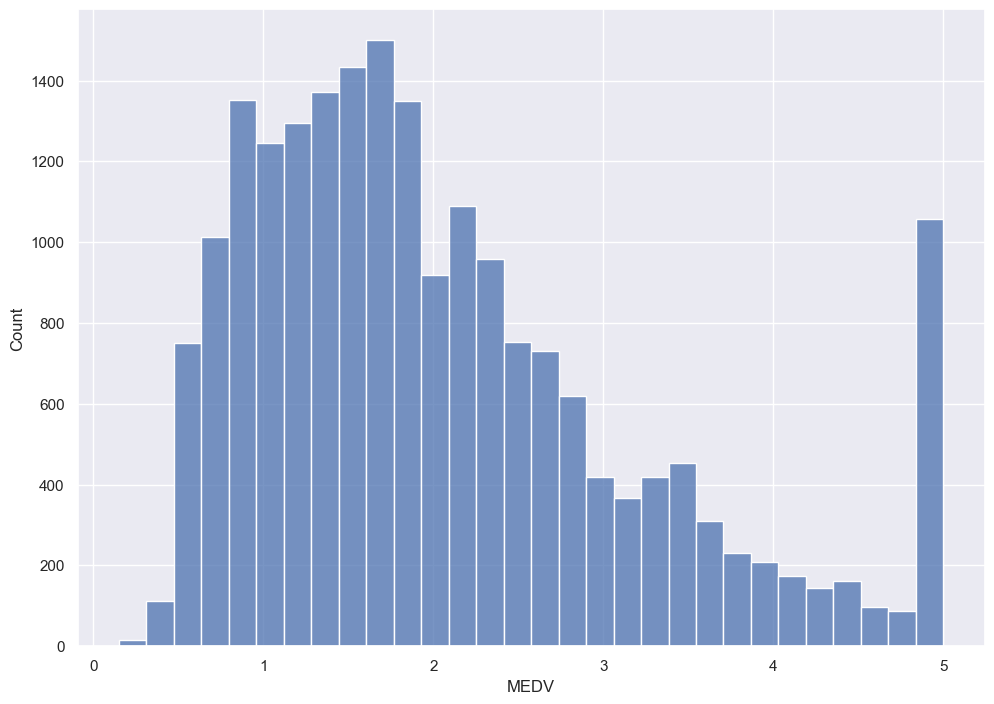

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(df['MEDV'], bins=30)
plt.show()

* Siempre es importante revisar que tus datos y visualizaciones sean consistentes entre sí. ¿El promedio y estadísticas que hiciste anteriormente, son consistentes con esta gráfica?
* ¿Qué información adicional te da la la visualización que no tenías anteriormente?
    * ¡Observa el incremento de número de casas con el precio máximo! Es muy probable que los datos sean "truncados": es decir, que cualquier valor por encima fue asignado a 50 para facilitar el análisis

# ¿Cuál es tu intuición?

* Revisa ahora el significado de las variables explicativas. Recuerda que el problema principal es lograr pronosticar precios usando variables asociadas
* Revisa nuevamente la descripción de las variables. Intuitivamente, ¿Crees que todas podrían afectar el nivel de precios de una casa? ¿Cuáles más que otras?

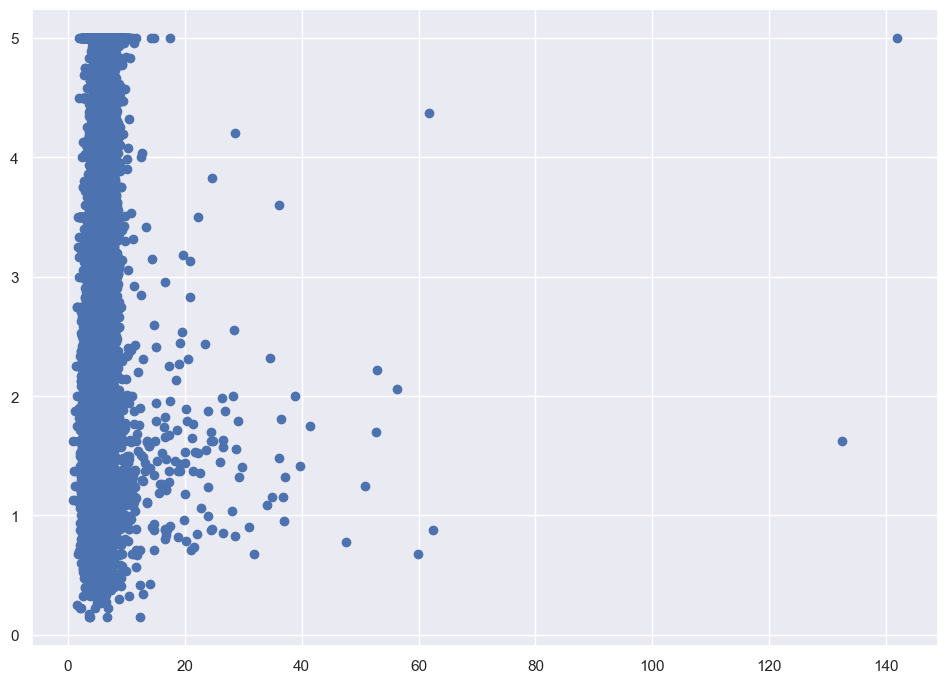

In [26]:
# una forma rápida de ver gráficas de puntos

plt.plot(df.AveRooms, df.MEDV, 'o') # 'o' muestra scatter (por defecto es línea)

## Primer modelo

## Entrenamiento vs. Test

* Es vital no usar los mismos datos de entrenamiento para medir el modelo. El objetivo de cualquier modelo predictivo es generar pronósticos en datos nuevos, o con los cuales el modelo no fue entrenado

* Una convención común es utilizar X para denotar las variables explicativas, Y para las explicativas

* TIP: nombrar las variables de forma explícita hará tu vida mucho más fácil. Evita variables como "a" o "b". Usa las convenciones y nombres explícitos, aún si eso implica nombres más largos

* Los datos de test se usan para hacer predicciones que el modelo "no ha visto", o que no se pasan para las estimaciones

In [28]:
# renombra las variables para usar las convenciones de X, y
X_rooms = df.AveRooms # única variables explicativa
y_price = df.MEDV # variable a predecir

In [29]:
X_rooms

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Name: AveRooms, Length: 20640, dtype: float64

In [30]:
X_rooms.shape

(20640,)

In [31]:
X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(20640, 1)
(20640, 1)


* Scikit learn tiene funciones muy sencillas para segmentar la base de datos

* La segmentación de "train" o entrenamiento se usa para estimar el modelo, la de "test" para realizar el pronóstico y reporte final de métrica desempeño (!qué tan buenas o malas son las predicciones!)

* Nuevamente, X representa variables a usar para predecir, mientras Y las que quieres predecir

In [32]:
# en una sóla línea de código se obtienen los cuatros segmentos
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)

# asegúrate que las dimensiones de los datos son las esperadas
print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(16512, 1)
(4128, 1)
(16512, 1)
(4128, 1)


* RMSE y R2 son las métricas más utilizadas para regresiones

* RMSE tiene en cuenta las diferencias entre valores reales y predicciones para cada observación
    * Calculada con Numpy
    
* R2 explica qué tanto varía la variable objetivo a cause de las explicativas
    * Siempre está entre 0 y 1
    * Calculada con métodos de Scikit Learn

* Para la implementación, es vital pasar como argumentos los datos adecuados. ¡Por eso es tan importante nombrar las variables de forma adecuada!

In [33]:
# instancia el modelo
reg_1 = LinearRegression() # existen muchos otros algoritmos

reg_1.fit(X_train_1, Y_train_1) # estima el modelo siempre con datos de entrenamiento

y_train_predict_1 = reg_1.predict(X_train_1) # genera las predicciones

# RMSE en numpy usa sólo los valores reales y las predicciones
rmse = (np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1)))

# en scikitlearn se estima en una sóla línea las predicciones
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print("Desempeño del modelo para los datos de entrenamiento")
print("--------------------------------------")
print('RMSE: {}'.format(rmse))
print('R2: {}'.format(r2))
print("\n")

Desempeño del modelo para los datos de entrenamiento
--------------------------------------
RMSE: 1.135651911787784
R2: 0.02




In [34]:
# evaluación del modelo para datos de test

y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(mean_squared_error(Y_test_1, y_pred_1)))
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

print("Desempeño del modelo para los datos de test")
print("--------------------------------------")
print("RMSE: {}".format(rmse))
print("R2: {}".format(r2))
print("\n")

Desempeño del modelo para los datos de test
--------------------------------------
RMSE: 1.1599435100885314
R2: 0.02




* Observa que hay una diferencia entre la evaluación en entrenamiento y en test. Asegúrate siempre de reportar la de test

* ¿Por qué puede ser menor el desempeño de entrenamiento vs. test?
    * Aunque no profundizaremos en este curso, puede estar indicando que tu modelo es muy sencillo. Y tiene sentido, pues tienes una sóla variable

En las clases de este módulo, viste paso a paso desde cómo preparar la base de datos hasta la realización de un modelo sencillo de pronóstico de precios con una sóla variable.

En este proyecto, utilizarás la misma estructura para construir y evaluar un modelo más complejo que utiliza todas las  variables. Deberás replicar el código presentado en las clases y continuar con el presentado abajo.

Sin embargo, no tendrás el código completo. Utilizando lo que aprendiste en las clases anteriores, deberás completar el código siguiendo las indicaciones y comentarios.



Finalmente, deberás contestar las preguntas finales de forma abierta pero concisa. Estas te invitarán a preguntarte e investigar sobre el contexto del tipo de soluciones que podrías encontrar en la industria y sus usos.

In [ ]:
# define "X" como todo el conjunto de variables explicativas
# define "y" como la variable a predecir (precios) 

X =  # usa drop para pasar todo "df" excepto la variable objetivo
y = 

# usa "train_test_split" adicionando los parámetros test_size = 0.2 y random_state = 42

X_train, X_test, y_train, y_test = train_test_split(     ) # 4 argumentos


# crea una instancia para la regresión lineal
reg_all = 

# usa el método "fit" de la regresión con los datos de entrenamiento (tanto para X como para y)
reg_all.fit(     )

# usa el método "predict" de la regresión para hacer las predicciones sobre el conjunto X de entrenamiento
y_train_predict = reg_all.predict()

# calcula el rmse
# pasa los parámetros adecuados a "mean_squared_error". Recuerda que esta métrica se calcula
# usando la diferencia entre 
rmse = (np.sqrt(mean_squared_error(   ,   )))

# calcula el R cuadrado
r2 = round(reg_all.score(   ,    ),2)

print("Desempeño del modelo para los datos de entrenamiento")
print("--------------------------------------")
print('RMSE: {}'.format(rmse))
print('R2: {}'.format(r2))
print("\n")

In [ ]:
# repite el proceso para los datos de test

y_pred = 
rmse = 
r2 = 

print("Desempeño del modelo para los datos de test")
print("--------------------------------------")
print("RMSE: {}".format(rmse))
print("R2: {}".format(r2))
print("\n")

* Compara frente al modelo guiado durante el módulo que construiste usando una única variable. ¿Cómo cambian los pronósticos en test y entrenamiento?

In [ ]:
# pasa los precios reales de test y los pronósticos para graficarlos
plt.scatter(     ) # dos argumentos

# estas 5 líneas de código no necesitas modificarlas
plt.xlabel("Precio Real ($1000)")
plt.ylabel("Precio Pronosticado ($1000)")
plt.xticks(range(0, int(max(y_test)),2))
plt.yticks(range(0, int(max(y_test)),2))
plt.title("Precios Reales vs. Precios Pronosticados de Casas")

* ¿Cómo debería ser un pronóstico teórico perfecto en la gráfica anterior?

Otras preguntas:

* Para qué predecir?

* Investiga qué empresas utilizan pronóstico de precios

* Aplicabilidad de este modelo de de prediccion de precio vivienda hoy?